<IPython.core.display.Javascript object>


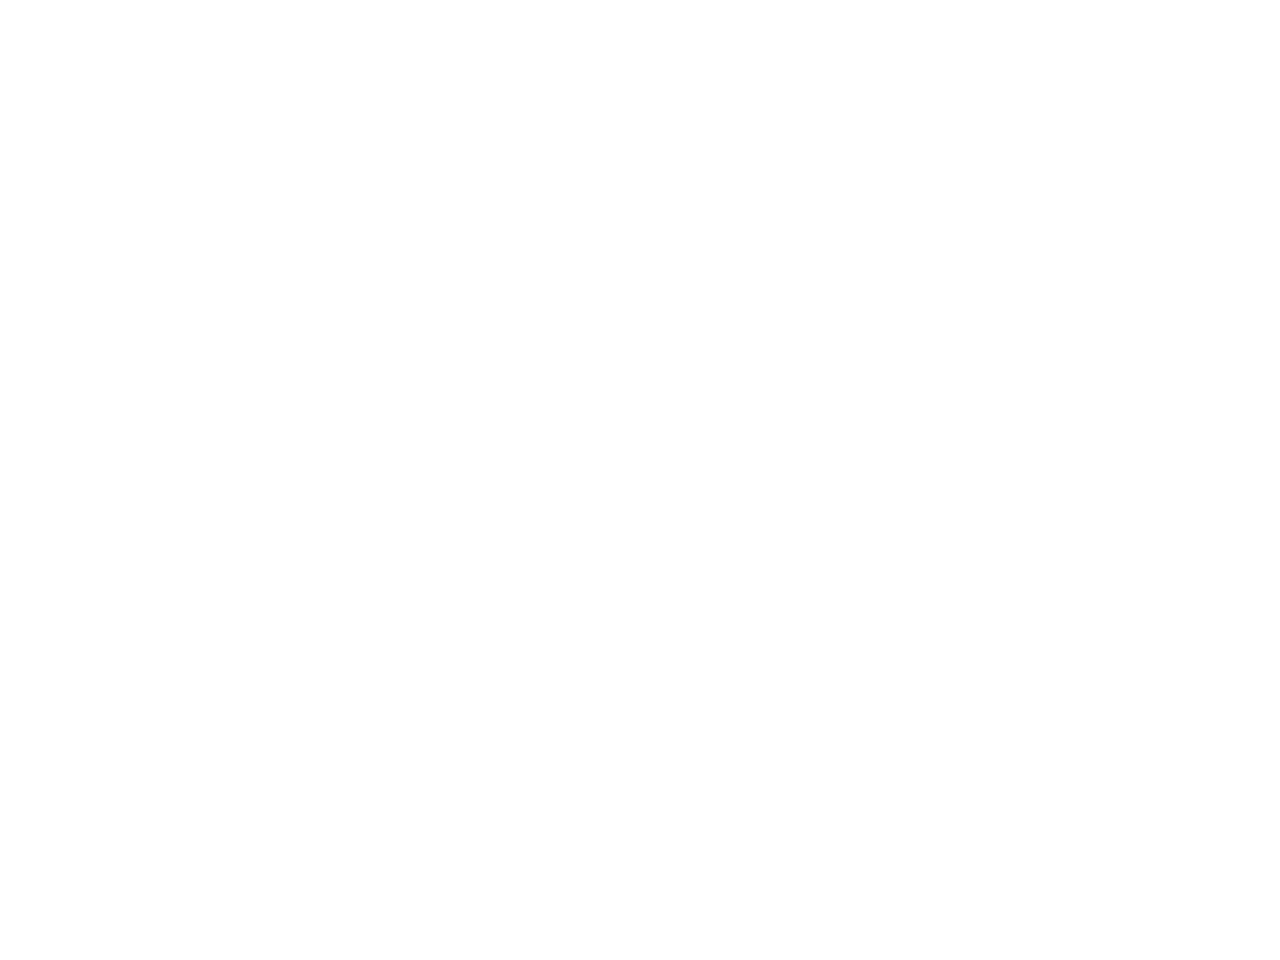

In [36]:
%run ../talktools.py

# Interactivity

More and more, notebooks are being distributed as part of academic and journalistic studies. Eg. https://github.com/jupyter/jupyter/wiki.

Maplotlib and IPython widgets are extremely useful, but Bokeh is a web-first plotting/viz package that was meant for interactivity through the browser.

Basic event handling
====================

Matplotlib has a builtin, toolkit-independent event model that is fairly rich.
If you want to develop full-fledged applications with very complex and fast
interactions, you are likely better off choosing a specific Graphical User
Interface (GUI) toolkit and using its specific event model.  But for many
scientific uses, what matplotlib offers is more than sufficient, and it has the
advantage of working identically regardless of the GUI toolkit you choose to
run matplotlib under.

Here we will cover the bare essentials only, for full details you should
consult the [event handling section](http://matplotlib.org/users/event_handling.html) of the matplotlib user guide.

The basic idea of *all* event handling is always the same: the windowing
environment registers an event (mouse movement, click, keyboard press, etc)
produced by the user.  In advance, you have registered *event handlers*:
functions you define that are meant to be called when specific types of events
occur.  The registration action is called *connecting* the event handler, and
is performed by the `mpl_connect` method of the figure canvas attribute (the
canvas is the drawing area of the figure object, the entire raw object where
events take place).

The windowing system will then pass the event (each event has some relevant
information that goes with it, such as which key or button was pressed) to your
function, which can act on it.  These functions are referred to as *callbacks*,
because they are meant to be 'called back' not by you, but by the windowing
toolkit when the right event goes by.

Here is the simplest possible matplotlib event handler:

In [ ]:
%matplotlib notebook
import numpy as np

import matplotlib.pyplot as plt
import ipywidgets as widgets


fig, ax = plt.subplots()
ax.plot(np.random.rand(100))

w = widgets.HTML()

def onclick(event):
    print(event)
    w.value = f'button={event.button}, x_canvas={event.x}, y_canvas={event.y}, x={event.xdata}, y={event.ydata}'

cid = fig.canvas.mpl_connect('button_press_event', onclick)
w

The ``FigureCanvas`` method ``mpl_connect`` returns a connection id which
is simply an integer.  When you want to disconnect the callback, just call::

    fig.canvas.mpl_disconnect(cid)

The most commonly used event types are ``KeyEvent`` and ``MouseEvent``, both of
which have the following attributes:

    ``x``
        x position - pixels from left of canvas

    ``y``
        y position - pixels from bottom of canvas

    ``inaxes``
        the ``matplotlib.axes.Axes`` instance if mouse is over axes

    ``xdata``
        x coord of mouse in data coords

    ``ydata``
        y coord of mouse in data coords

In addition, ``MouseEvent`` have:

    ``button``
        button pressed None, 1, 2, 3, 'up', 'down' (up and down are used for
        scroll events)

    ``key``
        the key pressed: None, any character, 'shift', 'win', or 'control'

Exercise (on your own)
-------------

Extend the scatter plot exercise above with the seismic stations, to print the location (four-letter string) of the station you click on.  Use a threshold for distance, and discriminate between a click below threshold (considered to be 'on') vs a miss, in which case you should indicate what the closest station is, its coordinates and the distance to it from the click.

# Bokeh & ipywidgets

1. **Bokeh** - Interactive web vizualization library for Python ("Shiny for Python", "d3 for Python")

    - interactive viz
    - "novel graphics"
    - streaming, dynamic large data (<500k data points)
    - meant for the web browser: with or without a backend serve
    - no javascript needed (but you can use javascript alongside it)
    
2. **Datashader** - Statistically driven interactive viz for large datasets 


cf. Van de Ven: https://www.youtube.com/watch?v=LXLQTuSSKfY

### ipwidgets

Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc.  You can use widgets to build interactive GUIs for your notebooks.
You can also use widgets to synchronize stateful and stateless information between Python and JavaScript.

https://ipywidgets.readthedocs.io

In [ ]:
import ipywidgets as widgets

In [ ]:
from IPython.display import display
w = widgets.IntSlider()
display(w)

In [ ]:
w

In [ ]:
w.close()

In [ ]:
mywid = widgets.Text(value='Hello', disabled=False)

In [ ]:
mywid.value

In [ ]:
import numpy as np

from bokeh.plotting import figure, show, output_file, output_notebook

## show inline in the notebook
output_notebook()

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

TOOLS="hover,crosshair,pan,wheel_zoom,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select"

p = figure(tools=TOOLS,title="Top Title with Toolbar", toolbar_location="above",
           plot_width=600, plot_height=600)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)


#output_file("color_scatter.html", title="color_scatter.py example")

show(p)  # open a browser

In [ ]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)


def my_function_update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()

show(p, notebook_handle=True)

In [ ]:
interact(my_function_update, f=["sin", "cos", "tan"], w=(0,100), A=(1,5), phi=(0, 20, 0.1))

We can use bokeh as the backend plotting framework for pandas

In [ ]:
#!pip install pandas-bokeh

In [ ]:
import pandas as pd
pd.set_option("plotting.backend", "pandas_bokeh")

In [ ]:
df = pd.read_csv("../00_numpy_scipy_pandas/full_moon.csv", index_col=0, parse_dates=True)

In [ ]:
df.plot()

## High-level charts with holoviews

The high level charting can be done with Holoviews (http://holoviews.org/) and `bokeh`. The holohviews interface provides a fast, convenient way to create common statistical charts with a minimum of code. Wherever possible, the interface is geared to be extremely simple to use in conjunction with Pandas, by accepting a DataFrame and names of columns directly to specify data.

Key Concepts:

- Data: Input data is either a Pandas `pandas.DataFrame` or other table-like
structure, yet also handling simple formats through conversion to a DataFrame internally.
- Smart Defaults: The attempt is made to provide unique chart attribute assignment
(color, marker, etc) by one or more column names, while supporting custom and/or advanced configuration through the same keyword argument.


In [ ]:
import holoviews as hv
hv.extension('bokeh')
renderer = hv.renderer('bokeh')

In [ ]:
#from bokeh.charts import BoxPlot, output_file, show
from bokeh.sampledata.autompg import autompg as df
df.head()

In [ ]:
title = "MPG by Cylinders and Data Source, Colored by Cylinders"
boxwhisker = hv.BoxWhisker(df, ['cyl', 'origin'], 'mpg', label=title)

In [ ]:
plot_opts = dict(show_legend=False, width=600)
style = dict(color='cyl')

boxwhisker(plot=plot_opts, style=style)

In [ ]:
# Using renderer save
renderer.save(boxwhisker, 'graph')

In [ ]:
import IPython
url = 'graph.html'
IPython.display.IFrame(url, width=700, height=350)

`hvplot` + pandas can be combined for interactive dashboards:

<img src="https://miro.medium.com/max/1400/1*bZjPtucT8O1esjQaGQenHw.gif">


https://towardsdatascience.com/the-easiest-way-to-create-an-interactive-dashboard-in-python-77440f2511d1

## Server-backed applications in Bokeh

https://docs.bokeh.org/en/latest/docs/gallery.html#gallery

https://docs.bokeh.org/en/2.4.1/docs/user_guide/server.html#building-bokeh-applications

## Bokeh/Datashader Exploration Example: Uber

With big data, your viz is lying to you: https://www.youtube.com/watch?v=6m3CFbKmK_c

Adapted from: https://anaconda.org/jbednar/uber/notebook, https://github.com/bokeh/datashader/blob/master/examples/nyc_taxi.ipynb

First: get some data.

In [ ]:
import datashader
print(datashader.__version__)

In [ ]:
%%bash
cd data
curl -k -O https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-sep14.csv
curl -k -O https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv

In [ ]:
import pandas as pd
path = 'data/uber-raw-data-{0}14.csv'
months = ['apr','sep']
%time df = pd.concat((pd.read_csv(path.format(m)) for m in months), ignore_index=True)
df.info()

In [ ]:
df.tail()

In [ ]:
df.describe()

Define a simple plot

In [ ]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

lat_range=(4.012130e+01,4.126100e+01)
lon_range=(-7.419670e+01,-7.256540e+01)

NYC = lon_range, lat_range 

plot_width  = int(750)
plot_height = int(plot_width//1.2)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=lon_range, y_range=lat_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p
    
options = dict(line_color=None, fill_color='blue', size=5)

# 1000-point scatterplot: undersampling


Any plotting program should be able to handle a plot of 1000 datapoints. Here the points are initially overplotting each other, but if you hit the Reset button (top right of plot) to zoom in a bit, nearly all of them should be clearly visible in the following Bokeh plot of a random 1000-point sample. If you know what to look for, you can even see the outline of Manhattan Island and Central Park from the pattern of dots. We've included geographic map data here to help get you situated, though for a genuine data mining task in an abstract data space you might not have any such landmarks. In any case, because this plot is discarding 99.99% of the data, it reveals very little of what might be contained in the dataset, a problem called undersampling.

In [ ]:
%%time

samples = df.sample(n=1000)
p = base_plot()

p.circle(x=samples['Lon'], y=samples['Lat'], **options)
show(p)

# 10,000-point scatterplot: overplotting
We can of course plot more points to reduce the amount of undersampling. However, even if we only try to plot 0.1% of the data, ignoring the other 99.9%, we will find major problems with overplotting, such that the true density of dropoffs in central Manhattan is impossible to see due to occlusion:

In [ ]:
%%time
samples = df.sample(n=10000)
p = base_plot()

p.circle(x=samples['Lon'], y=samples['Lat'], **options)
show(p)

Overplotting is reduced if you zoom in on a particular region (may need to click to enable the wheel-zoom tool in the upper right of the plot first, then use the scroll wheel). However, then the problem switches to back to serious undersampling, as the too-sparsely sampled datapoints get revealed for zoomed-in regions, even though much more data is available.

# 100,000-point scatterplot: saturation

If you make the dot size smaller, you can reduce the overplotting that occurs when you try to combat undersampling. Even so, with enough opaque data points, overplotting will be unavoidable in popular dropoff locations. So you can then adjust the alpha (opacity) parameter of most plotting programs, so that multiple points need to overlap before full color saturation is achieved. With enough data, such a plot can approximate the probability density function for dropoffs, showing where dropoffs were most common:

In [ ]:
%%time
options = dict(line_color=None, fill_color='blue', size=1, alpha=0.8)
samples = df.sample(n=100000)
p = base_plot(output_backend="webgl")
p.circle(x=samples['Lon'], y=samples['Lat'], **options)
show(p)

In [ ]:
import datashader as ds
from datashader import transfer_functions as tf

In [ ]:
%%time
cvs = ds.Canvas(plot_width=800, plot_height=500, x_range=lon_range, y_range=lat_range)
agg = cvs.points(df, 'Lon', 'Lat')
img = tf.shade(agg)

In [ ]:
img

In [ ]:
import holoviews.operation.datashader as hd
from datashader.colors import Hot
shaded = hd.datashade(hv.Points(df, ['Lon', 'Lat']), cmap=Hot)
hd.dynspread(shaded, threshold=0.2, max_px=2).opts(bgcolor='black', xaxis=None, yaxis=None, width=900, height=500)

a more complete example at: https://examples.pyviz.org/nyc_taxi/nyc_taxi.html

In [ ]:
%load_ext watermark

In [37]:
%watermark --iversions

pandas    : 1.3.5
json      : 2.0.9
autopep8  : 1.6.0
ipywidgets: 7.6.5
matplotlib: 3.5.1
numpy     : 1.20.3
datashader: 0.13.0
holoviews : 1.14.7
IPython   : 7.31.0

